In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from matplotlib.colors import ListedColormap

In [33]:

def load_data():
    data=pd.read_csv("User_Data.csv")
    return data

def eda(data):
    print(f"Data info {data.info()}")
    print(f"Missing values {data.isnull().sum()}")
    print(f"Summary statistics {data.describe()}")

    plt.figure(figsize=(12,8))
    plt.subplot(2,2,1)
    sns.histplot(data['Age'],bins=20,kde=True,color='blue')
    plt.title('Age Distribution')

    plt.subplot(2,2,2)
    sns.histplot(data['EstimatedSalary'],bins=20,kde=True,color='green')
    plt.title('Estimated Salary Distribution')

    plt.subplot(2,2,3)
    sns.boxplot(x='Purchased',y='Age',data=data)
    plt.title('Age by Purchased')

    plt.subplot(2, 2, 4)
    sns.boxplot(x='Purchased', y='EstimatedSalary', data=data)
    plt.title('Estimated Salary by Purchased')

    plt.tight_layout()
    plt.show()

    # correlation heatmap
    plt.figure(figsize=(8,8))
    sns.heatmap(data[['Age','EstimatedSalary','Purchased']].corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1)
    plt.title('Correlation ')
    plt.show()

def feature_engineering(data):
    data=data.drop('User ID',axis=1)
    data['Gender']=data['Gender'].map({'Female':0,'Male':1})
    X=data[['Gender','Age','EstimatedSalary']].values
    y=data['Purchased'].values

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

    scaler=StandardScaler()
    X_train[:,1:]=scaler.fit_transform(X_train[:,1:])
    X_test[:,1:]=scaler.transform(X_test[:,1:])

    return X_train,X_test,y_train,y_test,scaler

def plot_decision_boundary(X,y,model,scaler,feature_names):
    x_2d=X[:,1:]
    model_2d=LogisticRegression(penalty='l2',C=1.0,random_state=42)
    model_2d.fit(x_2d,y)

    # now we will create a mash grid for decision boundary
    x_min,x_max=x_2d[:,0:].min() -0.5,x_2d[:,0:].max()+0.5
    y_min,y_max=x_2d[:,1:].min()-0.5,x_2d[:,1:].max()+0.5
    xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))

    Z= model_2d.predict(np.c_[xx.ravel(),yy.ravel()]) # this is for the concateness of flatten the grid of the xx and also for the yy
    Z=Z.reshape(xx.shape)

    plt.figure(figsize=(10,6))
    plt.contourf(xx,yy,Z,alpha=0.3,cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(x_2d[y == 0][:, 0], x_2d[y == 0][:, 1], color='red', label='Not Purchased', alpha=0.6)
    plt.scatter(x_2d[y == 1][:, 0], x_2d[y == 1][:, 1], color='blue', label='Purchased', alpha=0.6)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title('Logistic Regression Decision Boundary')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_roc_curve(y_test,y_pred_proba):
    fpr,tpr,_=roc_curve(y_test,y_pred_proba)
    roc_auc=auc(fpr,tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
Data info None
Missing values User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
Summary statistics             User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.0000

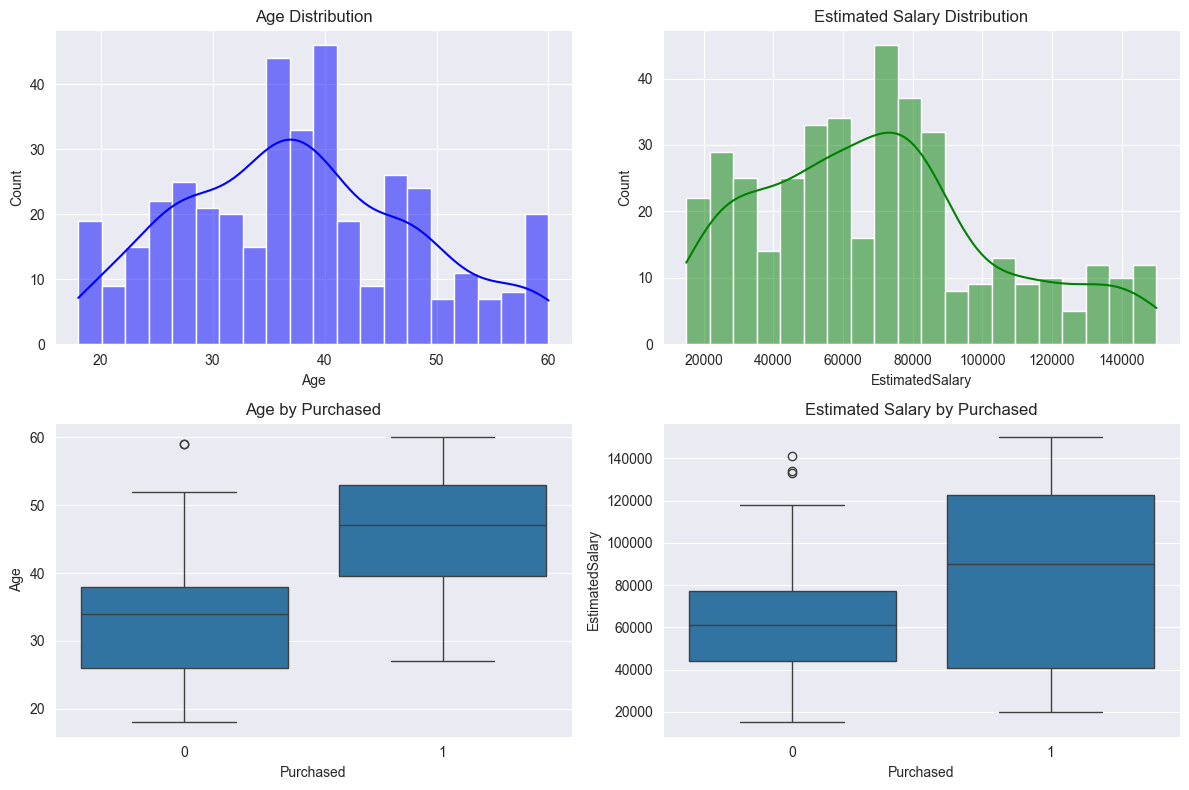

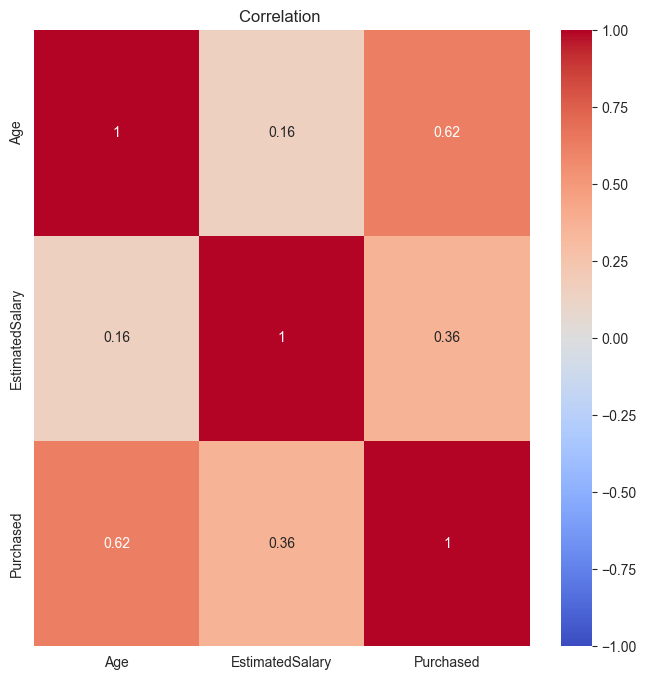

Accuracy score is :-  0.85
Classification report is: -
               precision    recall  f1-score   support

           0       0.83      0.96      0.89        52
           1       0.90      0.64      0.75        28

    accuracy                           0.85        80
   macro avg       0.87      0.80      0.82        80
weighted avg       0.86      0.85      0.84        80

Sample Predictions (first 5):
Sample 1: Probability=0.1445, Predicted Class=0, True Class=0
Sample 2: Probability=0.9635, Predicted Class=1, True Class=1
Sample 3: Probability=0.3026, Predicted Class=0, True Class=0
Sample 4: Probability=0.3026, Predicted Class=0, True Class=1
Sample 5: Probability=0.1445, Predicted Class=0, True Class=0


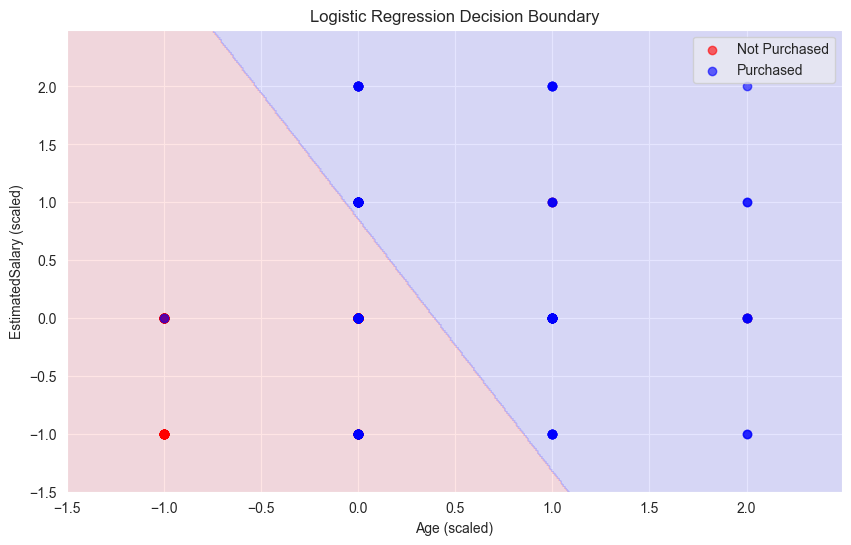

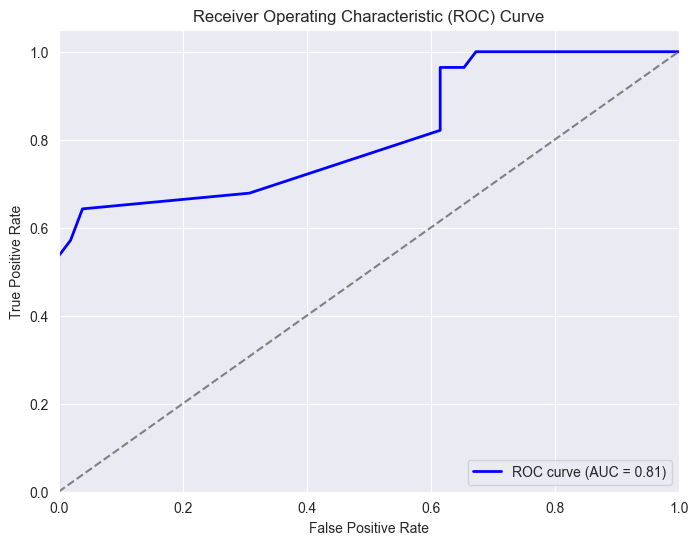

In [34]:
if __name__=="__main__":
    data=load_data()
    eda(data)
    X_train,X_test,y_train,y_test,scaler=feature_engineering(data)

    model=LogisticRegression(penalty='l2',C=1.0,random_state=42)
    model.fit(X_train,y_train)

    y_pred=model.predict(X_test)
    y_pred_proba=model.predict_proba(X_test)[:,1]
    accuracy=accuracy_score(y_test,y_pred)
    print("Accuracy score is :- ",accuracy)
    print("Classification report is: -\n",classification_report(y_test,y_pred))

    print("Sample Predictions (first 5):")
    for i in range(5):
        print(f"Sample {i+1}: Probability={y_pred_proba[i]:.4f}, Predicted Class={y_pred[i]}, True Class={y_test[i]}")

    plot_decision_boundary(X_train, y_train, model, scaler, ['Age (scaled)', 'EstimatedSalary (scaled)'])


    plot_roc_curve(y_test, y_pred_proba)